In [1]:
# Calculates the average channel viewcount growth per day, saves csv

import pandas as pa 
import numpy as np

import json
import os
import networkx as nx
import pygraphviz as gz
from networkx.drawing.nx_pydot import write_dot

import matplotlib.pyplot as plt
#%matplotlib notebook

import itertools

import csv
from sqlalchemy import exists, func

from database import *

from matplotlib import pylab, pyplot

import seaborn as sns
sns.set(color_codes=True)

current_palette = sns.color_palette()
first = current_palette[0]
second = current_palette[1]
sns.set_palette(
    [second, first] + current_palette[2:]
)

from scipy import stats, integrate

In [2]:
DIR = '../../data/data_evaluation_2'

db = YTDatabase()

/home/mlode/intel/intelpython27/lib/python2.7/site-packages/sqlalchemy/engine/default.py:470: Warning: Can't create database 'mlode'; database exists
  cursor.execute(statement, parameters)


In [3]:
with db._session_scope(False) as session:

    df_channel_history = pa.read_sql(session.query(ChannelHistory).statement, db.engine)


In [4]:
df_channel_history[df_channel_history.channelID == 'UC-lHJZR3Gqxm24_Vd_AJ5Yw']

,id,channelID,viewCount,subscriberCount,commentCount,videoCount,crawlTimestamp
58,59,UC-lHJZR3Gqxm24_Vd_AJ5Yw,14132206795,51598211,289181,3057,2016-12-28 02:57:16
8000,8011,UC-lHJZR3Gqxm24_Vd_AJ5Yw,14145979497,51645606,289181,3058,2016-12-29 00:00:06
15942,15963,UC-lHJZR3Gqxm24_Vd_AJ5Yw,14158774806,51692274,289181,3059,2016-12-30 00:00:05
23883,23914,UC-lHJZR3Gqxm24_Vd_AJ5Yw,14171475075,51731668,289181,3060,2016-12-31 00:00:07
31824,31865,UC-lHJZR3Gqxm24_Vd_AJ5Yw,14182683968,51774245,289181,3061,2017-01-01 00:00:04
39765,39816,UC-lHJZR3Gqxm24_Vd_AJ5Yw,14193935233,51807431,289181,3062,2017-01-02 00:00:10
47706,47767,UC-lHJZR3Gqxm24_Vd_AJ5Yw,14203784589,51840406,289181,3063,2017-01-03 00:00:05
55647,55718,UC-lHJZR3Gqxm24_Vd_AJ5Yw,14215372493,51896204,289181,3064,2017-01-04 00:00:06
63588,63669,UC-lHJZR3Gqxm24_Vd_AJ5Yw,14227166293,51946586,289181,3065,2017-01-05 00:00:05
71529,71620,UC-lHJZR3Gqxm24_Vd_AJ5Yw,14241617250,51980954,289181,3066,2017-01-06 00:00:05


In [5]:
channel_groups = df_channel_history.groupby(['channelID'])
counts = channel_groups.count().sort_values(by='viewCount')

print counts['id'].count()
print counts[counts.id != 64]['id'].count()

7942
30


In [6]:
group = channel_groups.get_group('UCK1i2UviaXLUNrZlAFpw_jA')
group = group.sort_values(by='id')
group['diff'] = group['viewCount'] - group['viewCount'].shift(1)

group

,id,channelID,viewCount,subscriberCount,commentCount,videoCount,crawlTimestamp,diff
3919,3925,UCK1i2UviaXLUNrZlAFpw_jA,6294348732,5017530,101,321,2016-12-28 03:00:14,NaN
11859,11875,UCK1i2UviaXLUNrZlAFpw_jA,6306806646,5025907,101,322,2016-12-29 00:03:08,12457914.0
19802,19828,UCK1i2UviaXLUNrZlAFpw_jA,6319562857,5036506,101,322,2016-12-30 00:03:07,12756211.0
27743,27779,UCK1i2UviaXLUNrZlAFpw_jA,6332654585,5047671,101,322,2016-12-31 00:03:04,13091728.0
35684,35730,UCK1i2UviaXLUNrZlAFpw_jA,6345655230,5058529,101,323,2017-01-01 00:03:07,13000645.0
43624,43680,UCK1i2UviaXLUNrZlAFpw_jA,6358705350,5071510,101,319,2017-01-02 00:03:09,13050120.0
51566,51632,UCK1i2UviaXLUNrZlAFpw_jA,6266832291,5082663,101,316,2017-01-03 00:03:07,-91873059.0
59507,59583,UCK1i2UviaXLUNrZlAFpw_jA,6278092542,5093290,101,316,2017-01-04 00:03:06,11260251.0
67448,67534,UCK1i2UviaXLUNrZlAFpw_jA,6253900053,5103742,101,317,2017-01-05 00:03:04,-24192489.0
75387,75483,UCK1i2UviaXLUNrZlAFpw_jA,6266468980,5114273,101,317,2017-01-06 00:02:50,12568927.0


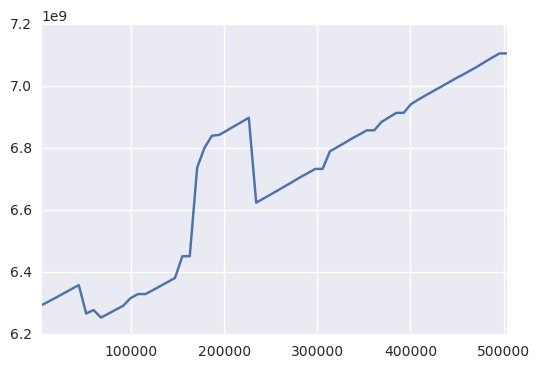

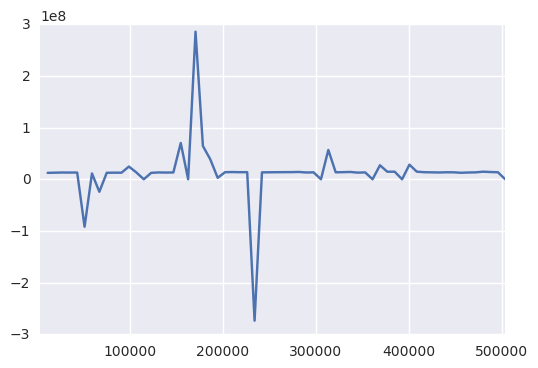

12883456.1587


In [7]:
fig = plt.figure()
group['viewCount'].plot()
plt.show()
fig1 = plt.figure()
group['diff'].plot()
plt.show()

print group['diff'].mean()

In [8]:
with db._session_scope(False) as session:
    df_channel_avg_viewcounts = pa.read_sql(session.query(Channel.id, Channel.title).statement, db.engine)

df_channel_avg_viewcounts = df_channel_avg_viewcounts.set_index(['id'])
df_channel_avg_viewcounts['mean viewCount'] = np.nan


for name, group in channel_groups:
    ##print name
    group = channel_groups.get_group(name)
    group = group.sort_values(by='id')
    group['diff'] = group['viewCount'] - group['viewCount'].shift(1)
    df_channel_avg_viewcounts.loc[name, 'mean viewCount'] = group['diff'].mean()


df_channel_avg_viewcounts.head()

,title,mean viewCount
id,,
UC__Pj66OeDibNZNN__L913g,TRACKS - ARTE,3640.666667
UC__PZLSRGtUQiTtvm3hPoEQ,Cripta dos Mistérios,1854.222222
UC__rmdgxs3ZF0zK_he7Tmig,Contoured Living,770.365079
UC_-CxgsxX0tpnm24WO-797Q,Mega Gumelar,4623.412698
UC_1FUFB6TlGeGOyDI4ikkzg,Best Games For Kids TV,50151.746032


In [9]:
df_channel_avg_viewcounts.loc['UC-lHJZR3Gqxm24_Vd_AJ5Yw']

title               PewDiePie
mean viewCount    1.03232e+07
Name: UC-lHJZR3Gqxm24_Vd_AJ5Yw, dtype: object

In [10]:
df_avg_viewcounts_sorted = df_channel_avg_viewcounts.sort_values(by='mean viewCount', ascending=False)

df_avg_viewcounts_sorted.to_csv(DIR+r'/df_channel_avg_viewcounts.txt', sep=str('\t'), encoding='utf-8')